<h1 style="color:#007bff;">Milestone 3: Exploratory Data Analysis (EDA)</h1>


<h2 style="color:#007bff;">Title</h2>


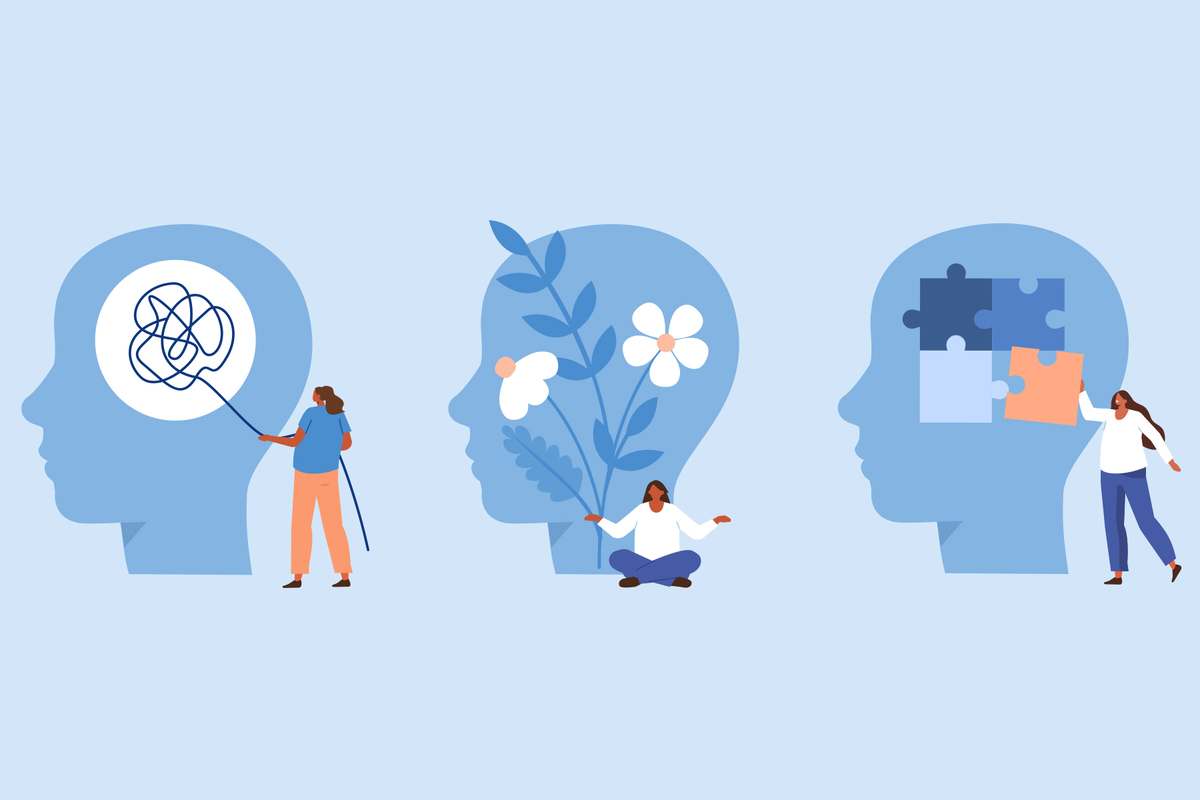

In [78]:
from IPython.display import display, Image

img = 'C:/Users/CELESTE/CodeOp/Module_3/EDA-milestone-3/Img_MentalHealth_2.jpg'

display(Image(filename=img))

### Context

This project focuses on exploring and analyzing data related to mental health in the workplace, an increasingly important topic given the prevalence of stress, anxiety, and other mental health issues in the work environment.

The aim is to understand the prevalence of these problems among individuals and the factors that influence them, with the intention of promoting their well-being and creating healthier work environments. Through exploratory data analysis, the goal is to identify insights that can support strategies for improving mental health and well-being at work.


### Importing Libraries and Loading Dataset

In [79]:
# import all necesary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [80]:
# read & load the dataset into pandas dataframe
df = pd.read_csv("C:\\Users\\CELESTE\\CodeOp\\Module_3\\EDA-milestone-3\\archive\\mental_health_dataset.csv")

# display the dataframe
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


### About the dataset

"This dataset appears to contain a variety of features related to text analysis, sentiment analysis, and psychological indicators, likely derived from posts or text data. Some features include readability indices such as Automated Readability Index (ARI), Coleman Liau Index, and Flesch-Kincaid Grade Level, as well as sentiment analysis scores like sentiment compound, negative, neutral, and positive scores. Additionally, there are features related to psychological aspects such as economic stress, isolation, substance use, and domestic stress. The dataset seems to cover a wide range of linguistic, psychological, and behavioural attributes, potentially suitable for analyzing mental health-related topics in online communities or text data."

The dataset used in this analysis was sourced from https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset. It is important to note that the dataset primarily consists of data from male participants. Therefore, a decision was made to conduct separate analyses for male and female participants to ensure a comprehensive understanding of the data and avoid potential biases.


In [81]:
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 292,364 & Columns: 17


## Starting the analysis

In [82]:
numerical_columns = df.columns[(df.dtypes != 'object').tolist()].tolist()

categorical_columns = df.columns[(df.dtypes == 'object').tolist()].tolist()

print(numerical_columns)
print(categorical_columns)

#Because all columns are categorical values, the following analysis is conducted...

[]
['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']


## EDA for Categorical Variables

In [83]:
df_cat_stats = pd.DataFrame(columns=['column', 'values', 'values_count_incna', 'values_count_nona', 'num_miss'])

tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['values_count_incna'] = len(list(df[c].unique()))
    tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    df_cat_stats = pd.concat([df_cat_stats, tmp], ignore_index=True)

df_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss
0,Timestamp,"[8/27/2014 11:29, 8/27/2014 11:31, 8/27/2014 1...",580,580,0
1,Gender,"[Female, Male]",2,2,0
2,Country,"[United States, Poland, Australia, Canada, Uni...",35,35,0
3,Occupation,"[Corporate, Student, Business, Housewife, Others]",5,5,0
4,self_employed,"[nan, No, Yes]",3,2,5202
5,family_history,"[No, Yes]",2,2,0
6,treatment,"[Yes, No]",2,2,0
7,Days_Indoors,"[1-14 days, Go out Every day, More than 2 mont...",5,5,0
8,Growing_Stress,"[Yes, No, Maybe]",3,3,0
9,Changes_Habits,"[No, Yes, Maybe]",3,3,0



*Notes*
- Change capital letters 
- Country: have 35 categories
- self_employed: 5202 NaNs
- family_history: 2 cat: 'No' y 'Yes' -> one-hot
- treatment: 2 cat: 'Yes' y 'No' -> one-hot 


In [84]:
# Change the column names 
df.columns = df.columns.str.title()

In [85]:
# Replace NaN values with "Not specified" 
df['Self_Employed'].fillna('Not specified', inplace=True)

In [86]:
#"Separate data by 'gender'
gender_groups = df.groupby('Gender')

female_df = gender_groups.get_group('Female')
male_df = gender_groups.get_group('Male')

Text(0, 0.5, 'Frequency')

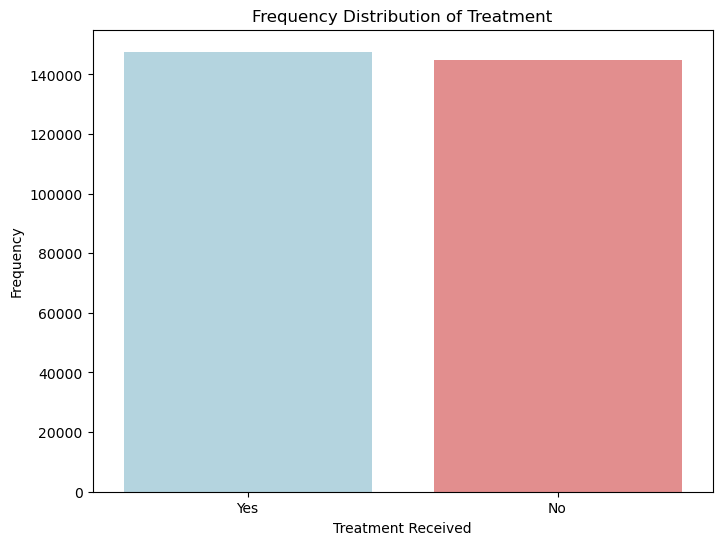

In [87]:
variable_treatment = 'Treatment'  

treatment_frequency = df[variable_treatment].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=treatment_frequency.index, y=treatment_frequency.values, palette=['lightblue', 'lightcoral'])
plt.title('Frequency Distribution of Treatment')
plt.xlabel('Treatment Received')
plt.ylabel('Frequency')

It can be observed that there is a similar proportion of individuals who have received treatment and those who have not.

Text(0, 0.5, 'Count')

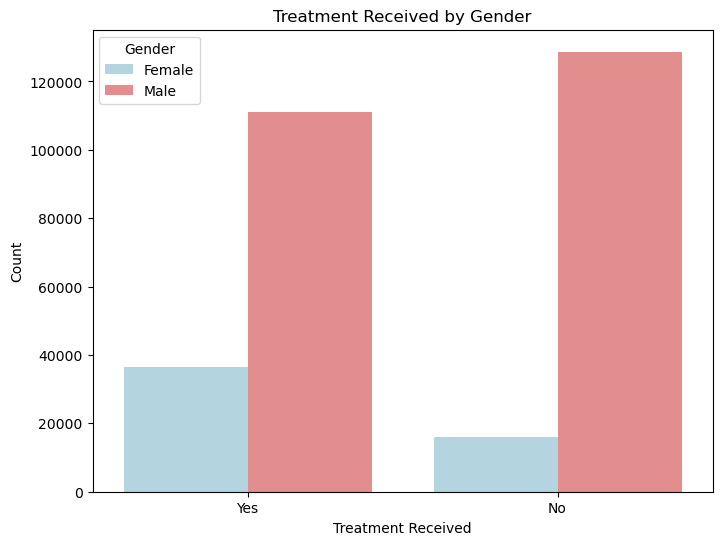

In [88]:
# Treatment received by Gender

plt.figure(figsize=(8, 6))
sns.countplot(x='Treatment', hue='Gender', data=df, palette=['lightblue', 'lightcoral'])
plt.title('Treatment Received by Gender')
plt.xlabel('Treatment Received')
plt.ylabel('Count')


As observed, the data is predominantly represented by males. The number of males receiving treatment is significantly higher than the number of females. Specifically, there are around 111,150 males receiving treatment, while there are only approximately 36,456 females. Additionally, in terms of individuals not receiving treatment, the disparity between males and females is also notable, with around 128,700 males and approximately 16,058 females. This gender imbalance in the data representation is important to consider when interpreting the results and may influence the conclusions that can be drawn from the analysis.

In [89]:
# In order to visualize the data accurately and without bias, it will be separated into female and male groups, as mentioned earlier.
# 
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']


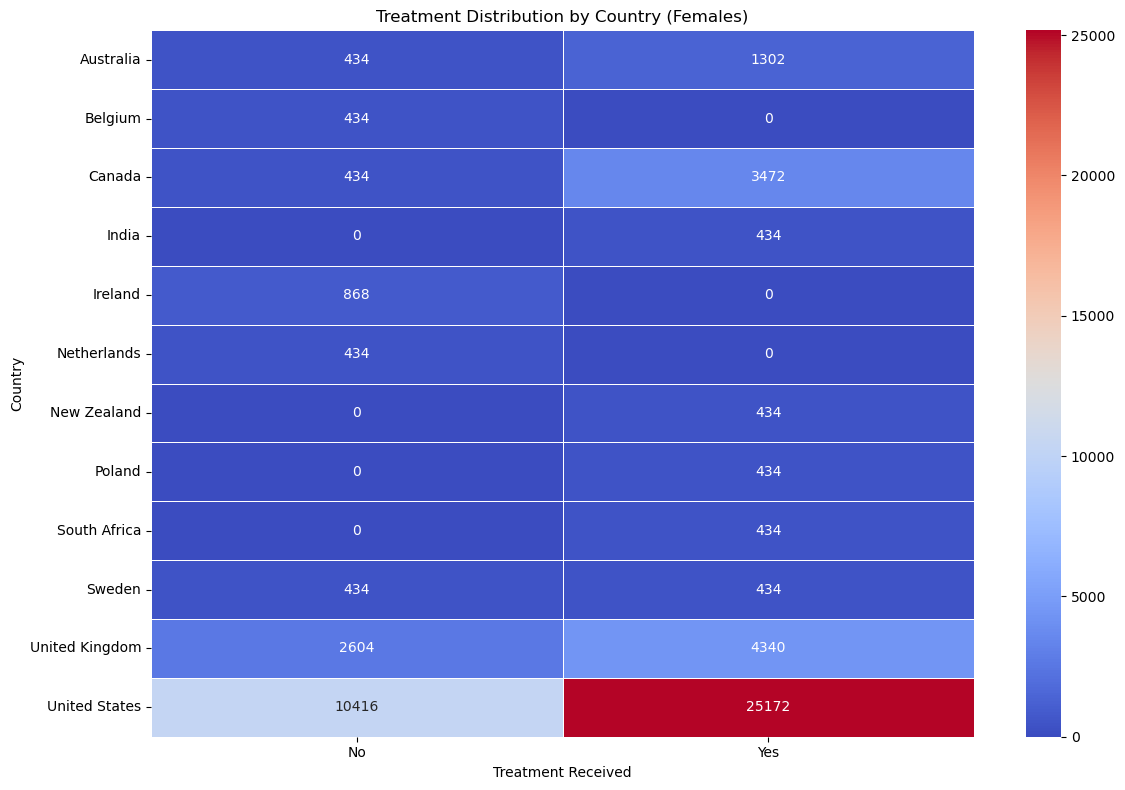

In [90]:
# Creating a pivot table to count the number of treatments received in each country with females data
pivot_table_female = df_female.pivot_table(index='Country', columns='Treatment', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_female, 
            cmap='coolwarm', 
            annot=True, 
            fmt='g', 
            cbar=True, 
            linewidths=0.5)
plt.title('Treatment Distribution by Country (Females)')
plt.xlabel('Treatment Received')
plt.ylabel('Country')
plt.tight_layout()


The distribution of treatment shows significant variations among the different countries, suggesting a disparity in the prevalence of mental health treatment among women. It is "curious" that the values of several columns are exactly the same, which could be attributed to either missing data or the data collection method.

It's interesting to note that countries like Ireland and the Netherlands report zero women receiving treatment, On the other hand, in countries like India, New Zealand, Poland, and South Africa, there are no women who do not receive treatment, which may indicate a better access to mental health care or greater awareness of the issue.

The disparity in treatment distribution among countries may reflect differences in awareness, access, and available resources to address women's mental health needs. Countries with a higher number of women receiving treatment may have greater awareness of the importance of treatment. Countries with a lower proportion of women receiving treatment may need increased attention and resources to address access barriers and improve awareness about mental health.

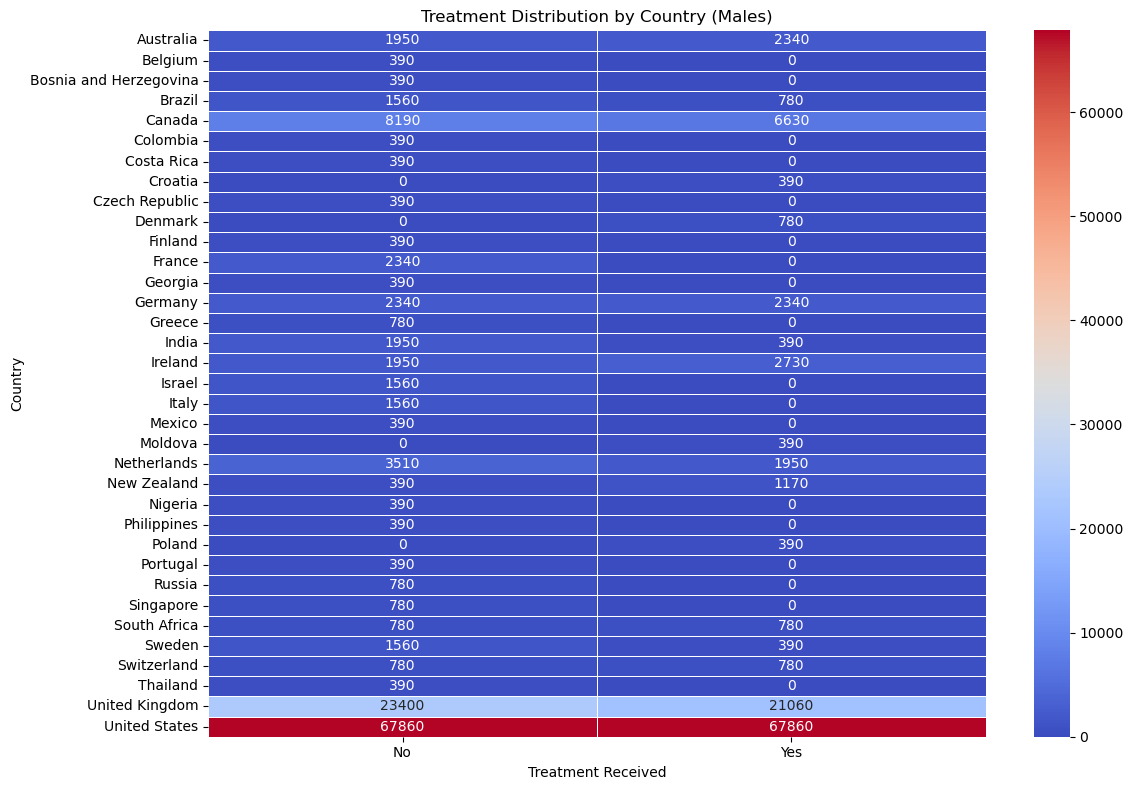

In [91]:
# Pivot table to count the number of treatments received in each country with male data
pivot_table_male = df_male.pivot_table(index='Country', columns='Treatment', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_male,
            cmap='coolwarm',
            annot=True, 
            fmt='g', 
            cbar=True, 
            linewidths=0.5)
plt.title('Treatment Distribution by Country (Males)')
plt.xlabel('Treatment Received')
plt.ylabel('Country')
plt.tight_layout()


Treatment,No,Yes
Occupation,,
Business,2923,6636
Corporate,2738,6216
Housewife,3552,8064
Others,3182,7224
Student,3663,8316


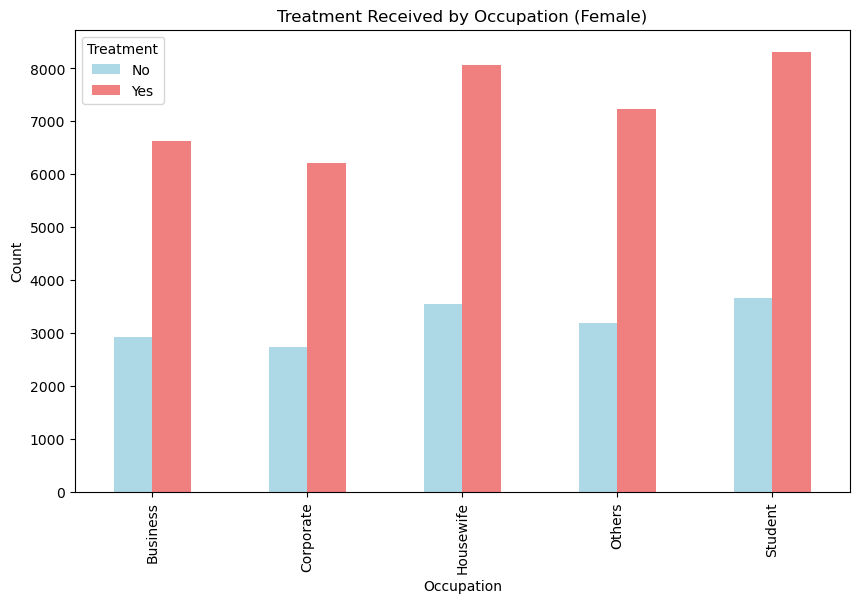

In [92]:
# Relationship between 'Treatment' and 'Occupation' female data

occupation_treatment_female.plot(
    kind='bar',
    figsize=(10, 6),
    color=['lightblue', 'lightcoral'])
plt.title('Treatment Received by Occupation (Female)')
plt.xlabel('Occupation')
plt.ylabel('Count')

occupation_treatment_female

The graphic reveals a notable difference in the number of women receiving treatment compared to those who are not. It is evident that the number of women receiving treatment exceeds those who do not across most occupations, based on these dataframe.

The analysis highlights that the highest number of women receiving treatment is found in the "Student" occupation category, followed by "Housewife." This suggests that students and housewifes may have greater awareness or access to mental health care compared to other occupational groups of women. However, conducting a more detailed analysis would be important to fully understand the reasons behind these differences and to identify potential areas for intervention to improve treatment access for other occupations.